In [1]:
#Age of patient at time of operation (numerical)
#Patient's year of operation (year - 1900, numerical)
#Number of positive axillary nodes detected (numerical)
#Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

haberman = pd.read_csv("haberman.csv")

In [2]:
print(haberman.shape)

(306, 4)


In [3]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
print(haberman.head())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


In [5]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

In [6]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


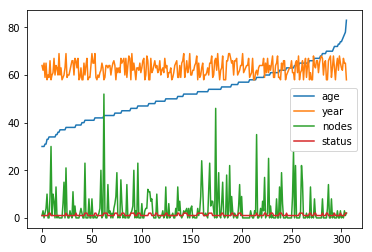

In [7]:
haberman.plot()
plt.show()

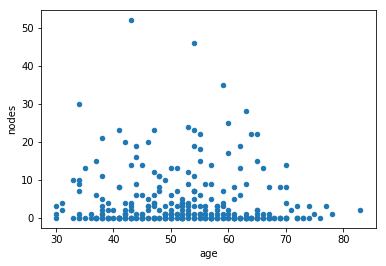

In [8]:
haberman.plot(kind='scatter', x='age', y='nodes') ;
plt.show()


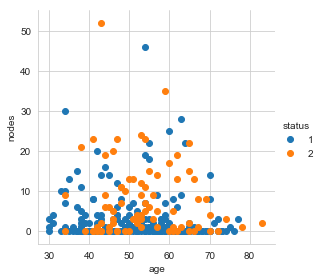

In [10]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

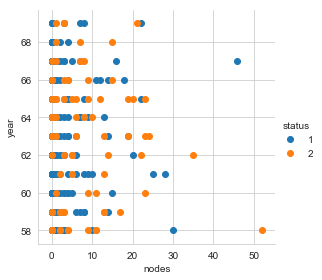

In [11]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "nodes", "year") \
   .add_legend();
plt.show();

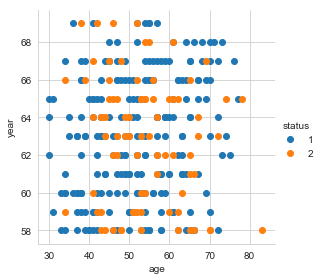

In [12]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.show();

None of the 2-D plots help us seperate the two different survival rates 

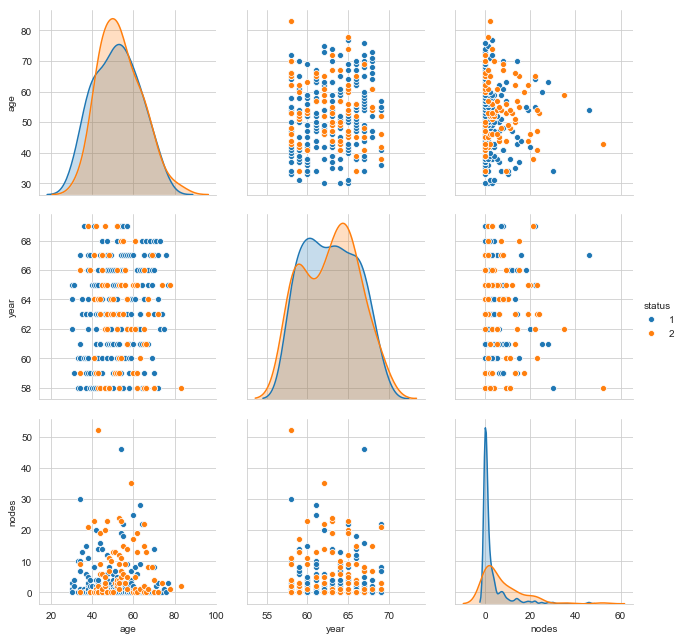

In [18]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data=haberman,
                  y_vars=['age', 'year', 'nodes'],
                  x_vars=['age', 'year', 'nodes'], hue="status", size=3);
plt.show()

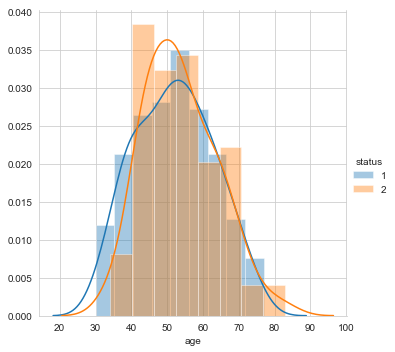

In [20]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

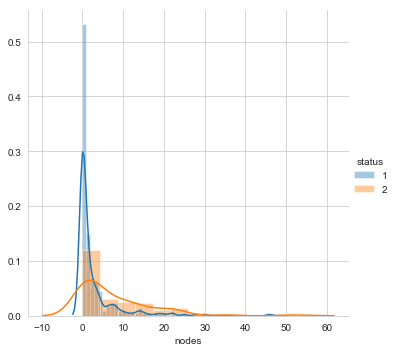

In [21]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

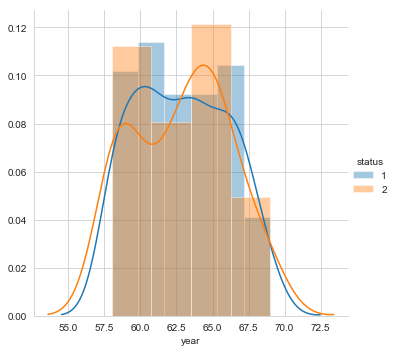

In [22]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

We can see that through PDFs it is very difficult to find out what is the survival rate of a person who underwent a surgery for breast cancer. Though, the plot for nodes and status show that if number of positive axillary nodes was less(less than 5) then it is highly probable that a person survived for more than 5 years after the surgery. We can use CDFs to answer questions like: 

a)What percentage of patients who survived more than 5 years had less than 5 axillary nodes?

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


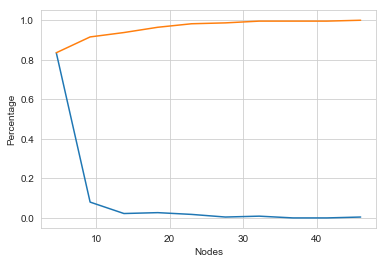

In [64]:
haberman_more_than_5years = haberman.loc[haberman["status"] == 1];

counts, bin_edges = np.histogram(haberman_more_than_5years['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Nodes')
plt.ylabel('Percentage')

plt.show();

We can clearly see that around 84% people who survived more than 5 years after surgery had less than 5 axillary nodes, more than 90% people who survived more than 5 years after surgery had less than 10 axillary nodes which means about 203 people out of 225 people who survived more than 5 years had less than 10 axillary nodes. 

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


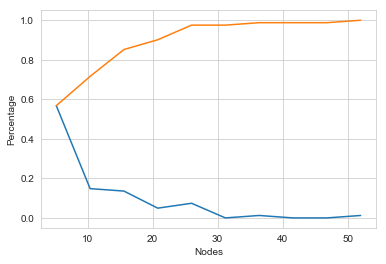

In [65]:
haberman_less_than_5years = haberman.loc[haberman["status"] == 2];

counts, bin_edges = np.histogram(haberman_less_than_5years['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Nodes')
plt.ylabel('Percentage')

plt.show();

But, when we try to visualize the dataset for people who survived less than 5 years, we see that around 70% of people who didnt survive for more than 5 years had less than 10 axillary nodes which means 56 out of 81 people who didn't survive more than 5 years had less than 10 axillary nodes

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


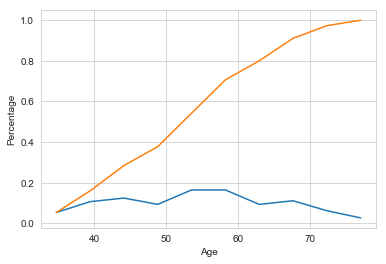

In [66]:
haberman_more_than_5years = haberman.loc[haberman["status"] == 1];

counts, bin_edges = np.histogram(haberman_more_than_5years['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Age')
plt.ylabel('Percentage')

plt.show();

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


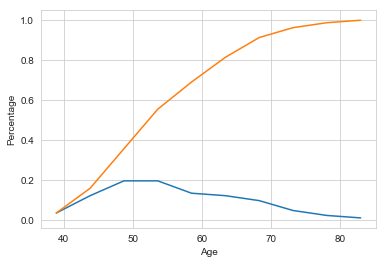

In [67]:
haberman_less_than_5years = haberman.loc[haberman["status"] == 2];

counts, bin_edges = np.histogram(haberman_less_than_5years['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Age')
plt.ylabel('Percentage')

plt.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


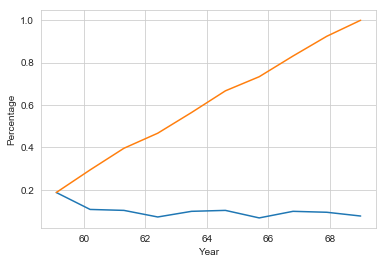

In [68]:
haberman_more_than_5years = haberman.loc[haberman["status"] == 1];

counts, bin_edges = np.histogram(haberman_more_than_5years['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Year')
plt.ylabel('Percentage')

plt.show();

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


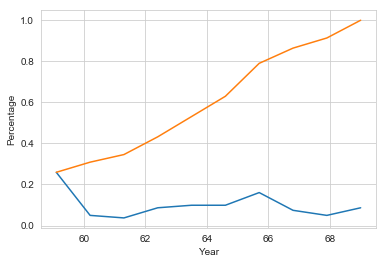

In [69]:
haberman_less_than_5years = haberman.loc[haberman["status"] == 2];

counts, bin_edges = np.histogram(haberman_less_than_5years['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Year')
plt.ylabel('Percentage')

plt.show();

The CDFs of age and year are not as helpful like their PDFs. All the data is well spread out across different ages and years.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


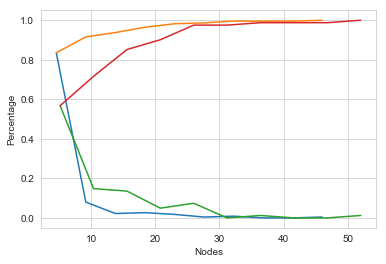

In [70]:

counts, bin_edges = np.histogram(haberman_more_than_5years['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



counts, bin_edges = np.histogram(haberman_less_than_5years['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Nodes')
plt.ylabel('Percentage')

plt.show();

### Observation

When we compare the two CDFs for no of nodes, we can see that the CDF of people with more than 5 years survival rate starts at somewhere where the no of nodes is around 4 and for people who did not survive more than 5 years it starts around 5. We can comfortably say that if no of axillary nodes is less than 4 then the person will survive more than 5 years and we will be right for about 84% of the times as we can see in the above CDFs.


### Conclusion for PDF and CDF : 
Overall the data is very well spread out across various dimensions and parameters and it is very difficult to conclude anything. But we can still conclude a few things with the help of number of positive axillary nodes. A person with less positive axillary nodes is more likely to survive more than 5 years than not. Even though the second possibility cannot be ruled out completely either.

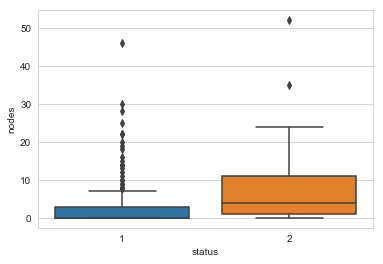

In [71]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

The above boxplot confirms what we have previously seen through PDF and CDF of nodes that people who survived for more than 5 years had axillary nodes close to 0.

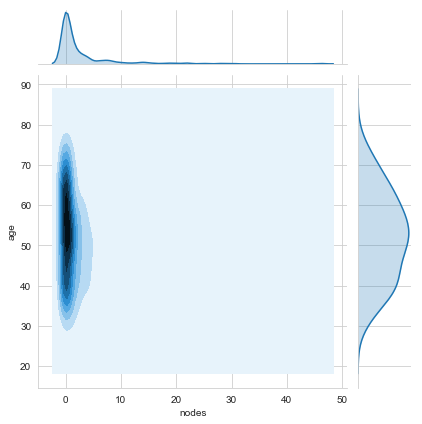

In [72]:
sns.jointplot(x="nodes", y="age", data=haberman_more_than_5years, kind="kde");
plt.show();

The above contour plot helps us to see concentration of people who survived more than 5 years across two parameters - age and nodes

## CONCLUSION

The dataset is well spread out across all features especially age and year. But we can still make some conclusions through no of axillary nodes. We can see that if the no of axillary nodes is less then it is more probable that the person would survive more than 5 years after surgery. Such statements cannot be made in case of other features like year and age.